In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as py
from sklearn.model_selection import train_test_split

In [3]:
# Charger les données
df = pd.read_excel('E:/MyWorks/Data analyst/Data Training/Survepi.xlsx')
df_cholera = df[df['maladie'] == 'CHOLERA']
#df_cholera['date'] = pd.to_datetime(df_cholera['Annee'].astype(str) + df_cholera['numsem'].astype(str).str.zfill(2) + '0', format='%Y%U%w')

In [157]:
# Sélectionner uniquement les colonnes nécessaires
df_cholera = df_cholera[['date','totalcas']]

In [7]:
df_cholera.shape

(1316, 17)

In [159]:
# Renommer les colonnes pour Prophet
df_cholera.rename(columns={'date': 'ds', 'totalcas': 'y'}, inplace=True)

In [161]:
# Convertir la colonne des dates en type datetime
df_cholera['ds'] = pd.to_datetime(df_cholera['ds'])

In [163]:
# Échantillonner par mois en prenant la moyenne des valeurs
df_cholera = df_cholera.resample('M', on='ds').sum().reset_index()

C:\Users\Peter ciya\AppData\Local\Temp\ipykernel_6484\94105082.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [135]:
# Transformation logarithmique pour stabiliser la variance
#df_cholera['y'] = df_cholera['y'].apply(lambda x: np.log(x + 1))

In [165]:
# Diviser les données en ensembles d'entraînement et de test
train_size = int(0.8 * len(df_cholera))
train, test = df_cholera[:train_size], df_cholera[train_size:]

In [167]:
# Initialiser et ajuster le modèle Prophet sur l'ensemble d'entraînement
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
# Initialiser et ajuster le modèle Prophet sur l'ensemble d'entraînement
model.fit(train)

02:18:15 - cmdstanpy - INFO - Chain [1] start processing
02:18:15 - cmdstanpy - INFO - Chain [1] done processing


In [169]:
# Faire des prévisions sur l'ensemble de test
future_periods = len(test) + 12  # Ajoutez 12 mois supplémentaires pour les prévisions futures
future = model.make_future_dataframe(periods=future_periods, freq='M')
forecast = model.predict(future)

C:\Users\Peter ciya\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [171]:
# Ajouter les prévisions à l'ensemble de test pour comparaison
test['yhat'] = forecast['yhat'].iloc[-len(test):].values

C:\Users\Peter ciya\AppData\Local\Temp\ipykernel_6484\389927165.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
# Calculer l'erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['y'], test['yhat'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 255193.82200322577


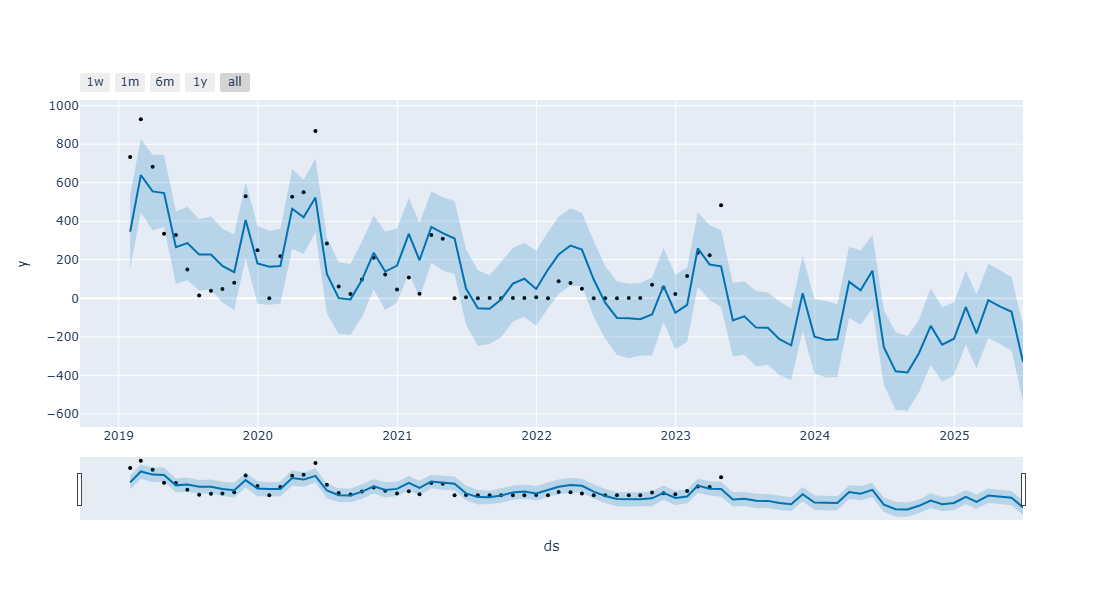

In [175]:
# Visualiser les résultats avec plot_plotly
fig = plot_plotly(model, forecast)
py.iplot(fig)

In [181]:
import matplotlib.pyplot as plt

In [187]:
# Données initiales
dates = [
    "2024-07-31", "2024-08-31", "2024-09-30", "2024-10-31", "2024-11-30", 
    "2024-12-31", "2025-01-31", "2025-02-28", "2025-03-31", "2025-04-30", 
    "2025-05-31", "2025-06-30"
]
values = [
    34.062533, 37.340345, 36.261437, 53.819961, 38.731594, 
    40.006675, 76.623178, 191.786514, 101.046022, 91.321047, 
    68.849512, 38.978926
]

# Arrondir les valeurs par défaut ou par excès
rounded_values = np.round(values)

# Prédictions LSTM
values1 = [
    531.3546, 485.34946, 460.90234, 443.61008, 441.38876, 
    433.3011, 425.32196, 430.15686, 476.4328, 487.54584, 
    488.89255, 485.65955
]

rounded_values1 = np.round(values1)
# Créer un DataFrame
data = pd.DataFrame({'Date': pd.to_datetime(dates), 'SARIMA': rounded_values, 'LSTM': rounded_values1})

In [223]:
rounded_values1

array([531., 485., 461., 444., 441., 433., 425., 430., 476., 488., 489.,
       486.])

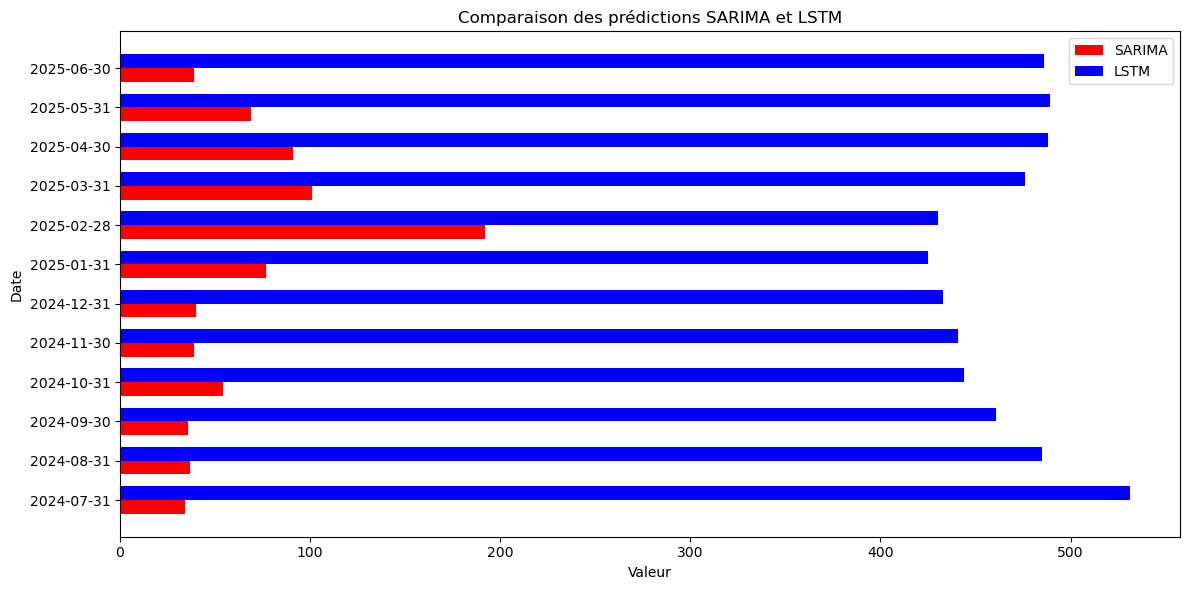

In [207]:
# Visualiser les données avec un graphique à barres inversé
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(data))

bar1 = plt.barh(index, data['SARIMA'], bar_width, label='SARIMA', color='r')
bar2 = plt.barh(index + bar_width, data['LSTM'], bar_width, label='LSTM', color='b')

plt.ylabel('Date')
plt.xlabel('Valeur')
plt.title('Comparaison des prédictions SARIMA et LSTM')
plt.yticks(index + bar_width / 2, data['Date'].dt.strftime('%Y-%m-%d'))
plt.legend()
plt.tight_layout()
plt.show()

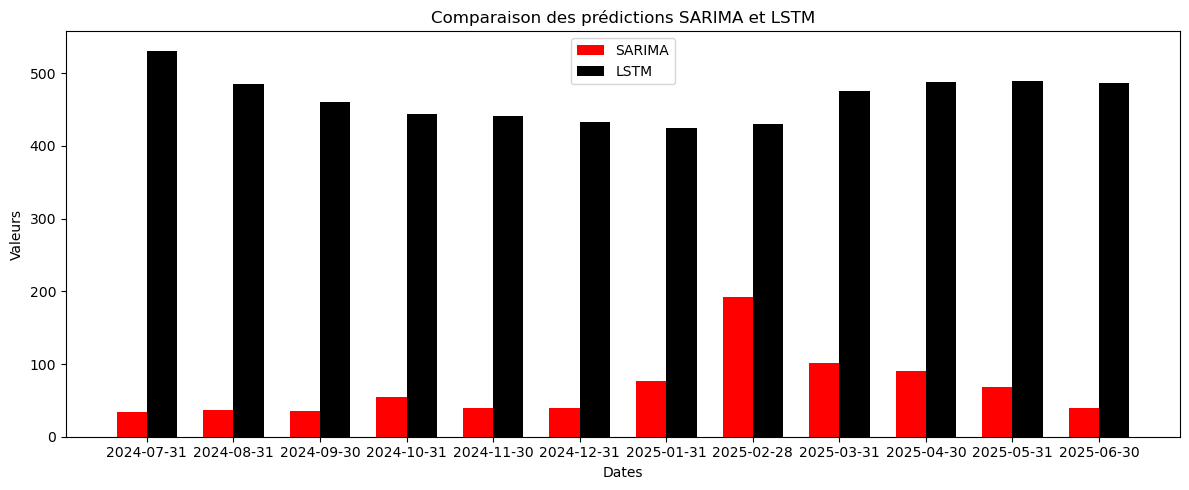

In [217]:
# Visualiser les données avec un graphique à barres
plt.figure(figsize=(12, 5))
bar_width = 0.35
index = np.arange(len(data))

bar1 = plt.bar(index, data['SARIMA'], bar_width, label='SARIMA', color='r')
bar2 = plt.bar(index + bar_width, data['LSTM'], bar_width, label='LSTM', color='black')

plt.xlabel('Dates')
plt.ylabel('Valeurs')
plt.title('Comparaison des prédictions SARIMA et LSTM')
plt.xticks(index + bar_width / 2, data['Date'].dt.strftime('%Y-%m-%d'))
plt.legend()
plt.tight_layout()
plt.show()